In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from ta.trend import SMAIndicator
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc



[*********************100%%**********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_5572\2159622400.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SM

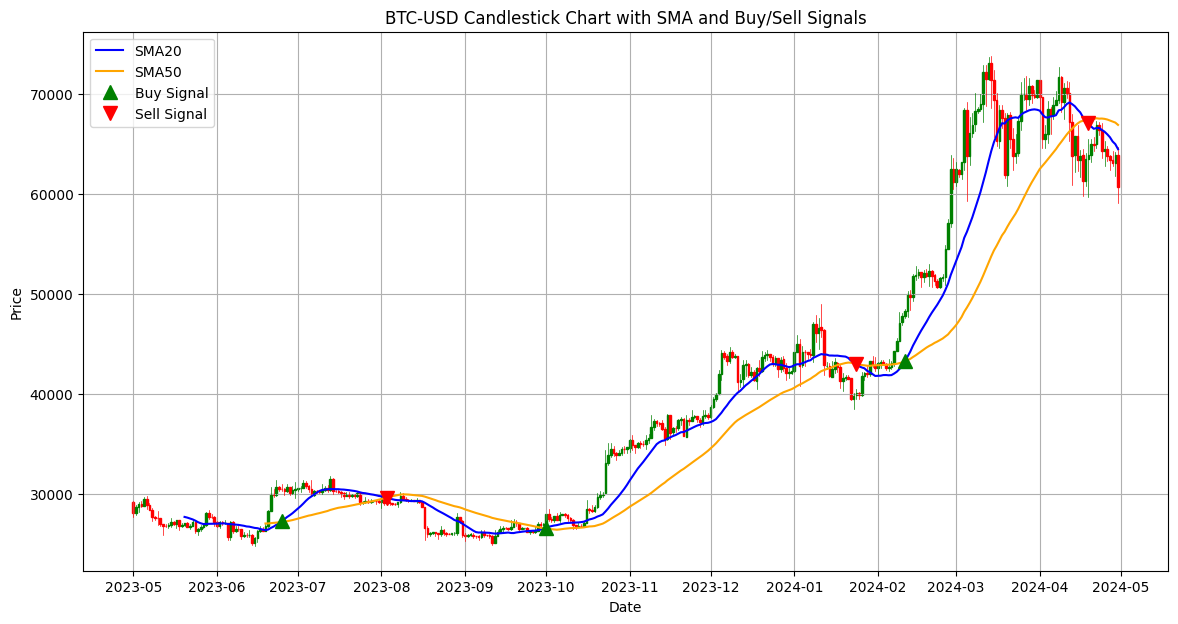

In [2]:

# Fetch historical data
type_of_trade = 'BTC-USD'
data = yf.download(type_of_trade , start='2023-05-01', end='2024-05-01', interval='1d')

# Calculate SMAs
data['SMA20'] = SMAIndicator(data['Close'], window=20).sma_indicator()
data['SMA50'] = SMAIndicator(data['Close'], window=50).sma_indicator()

# Define buy/sell signals
data['Signal'] = 0
data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, 0)
data['Position'] = data['Signal'].diff()

# Prepare the data for candlestick chart
data['Date'] = mdates.date2num(data.index)
ohlc = data[['Date', 'Open', 'High', 'Low', 'Close']]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')

# Plot SMAs
ax.plot(data['Date'], data['SMA20'], label='SMA20', color='blue', linewidth=1.5)
ax.plot(data['Date'], data['SMA50'], label='SMA50', color='orange', linewidth=1.5)

# Plot buy signals
ax.plot(data[data['Position'] == 1].index, 
        data['SMA20'][data['Position'] == 1], 
        '^', markersize=10, color='green', lw=0, label='Buy Signal')

# Plot sell signals
ax.plot(data[data['Position'] == -1].index, 
        data['SMA20'][data['Position'] == -1], 
        'v', markersize=10, color='red', lw=0, label='Sell Signal')

# Customize plot
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{type_of_trade} Candlestick Chart with SMA and Buy/Sell Signals')
plt.legend()
plt.grid()
plt.show()

In [3]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA20,SMA50,Signal,Position,Date
Date,,,,,,,,,,,
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,28091.568359,18655599976,NaN,NaN,0,NaN,19478.0
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,28680.537109,16432924527,NaN,NaN,0,0.0,19479.0
2023-05-03,28680.494141,29259.533203,28178.388672,29006.308594,29006.308594,19122972518,NaN,NaN,0,0.0,19480.0
2023-05-04,29031.304688,29353.185547,28694.039062,28847.710938,28847.710938,15548678514,NaN,NaN,0,0.0,19481.0
2023-05-05,28851.480469,29668.908203,28845.509766,29534.384766,29534.384766,17936566518,NaN,NaN,0,0.0,19482.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,64485.371094,64789.656250,63322.398438,63755.320312,63755.320312,24139372950,65954.427148,67428.698672,0,0.0,19839.0
2024-04-27,63750.988281,63898.363281,62424.718750,63419.140625,63419.140625,19530783039,65657.256445,67331.079609,0,0.0,19840.0
2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,63113.230469,17334827993,65231.350000,67223.366562,0,0.0,19841.0


[*********************100%%**********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_5572\3627069656.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SM

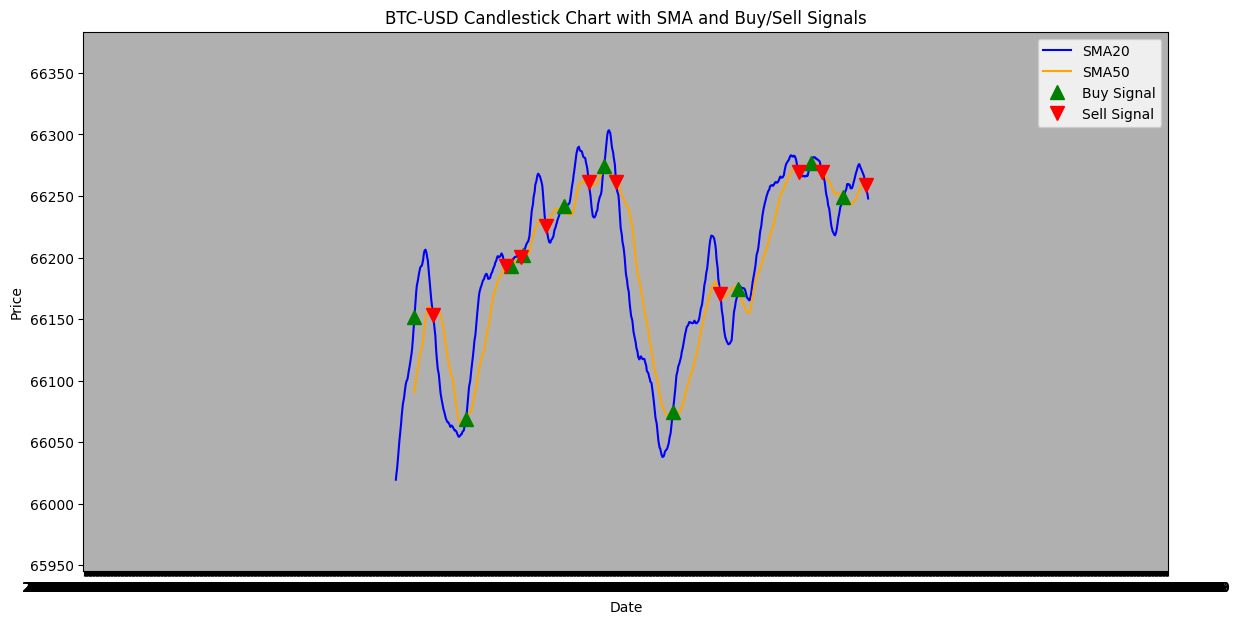

[*********************100%%**********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_5572\3627069656.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SM

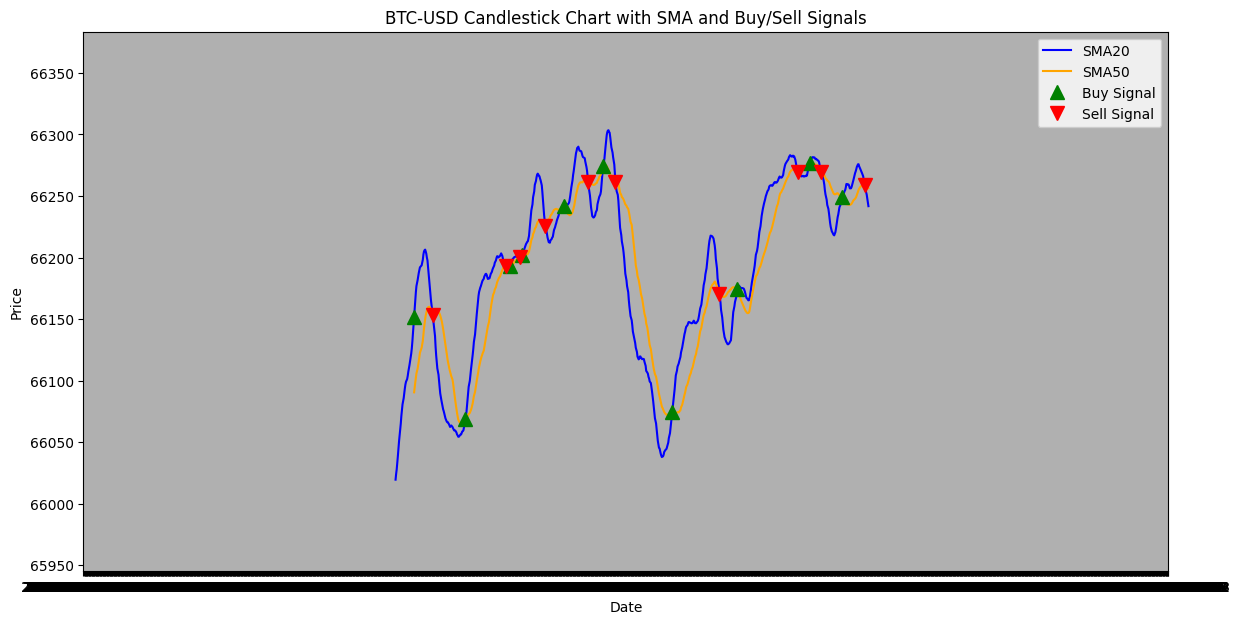

[*********************100%%**********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_5572\3627069656.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SM

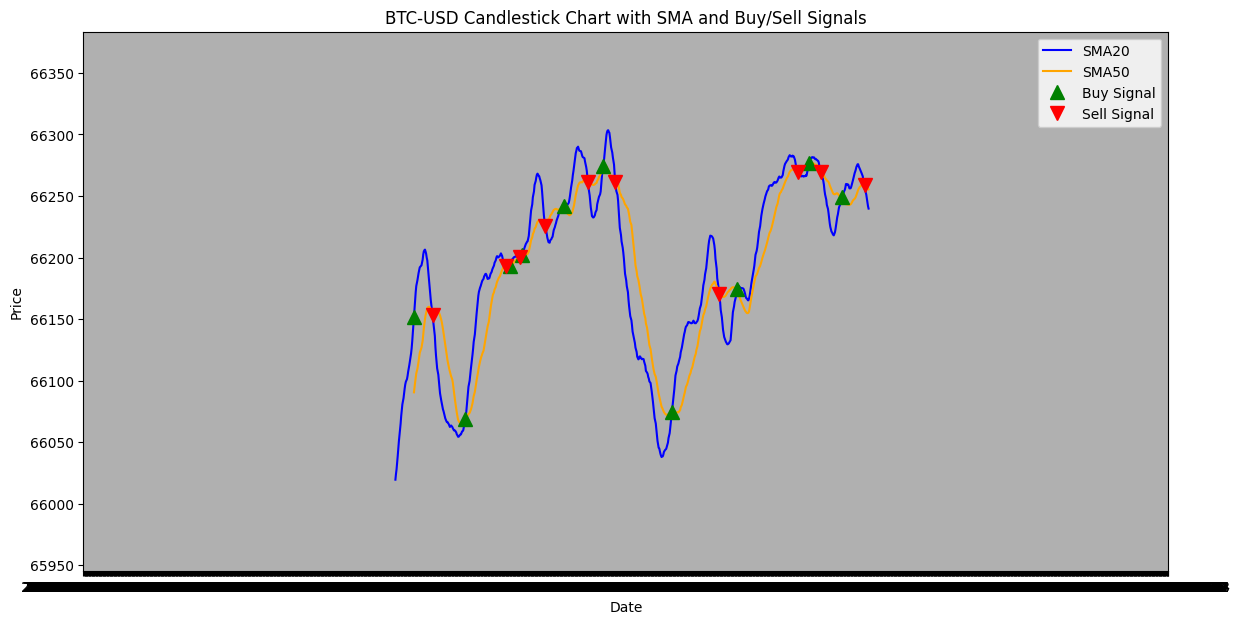

[*********************100%%**********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_5572\3627069656.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SM

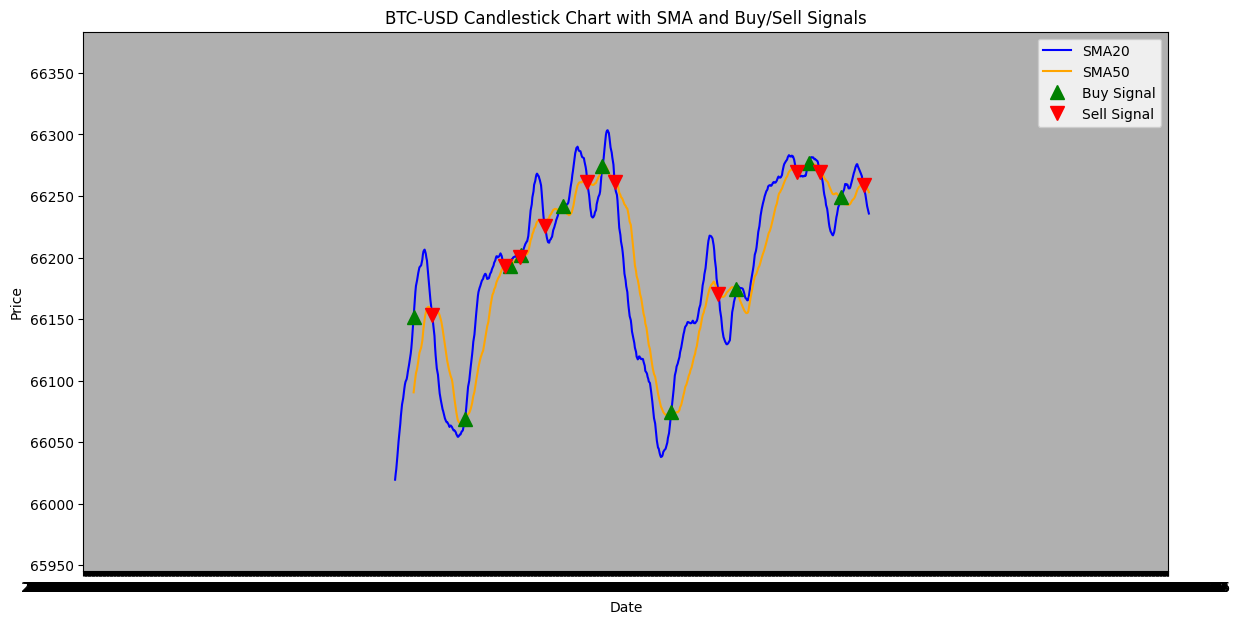

[*********************100%%**********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_5572\3627069656.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SM

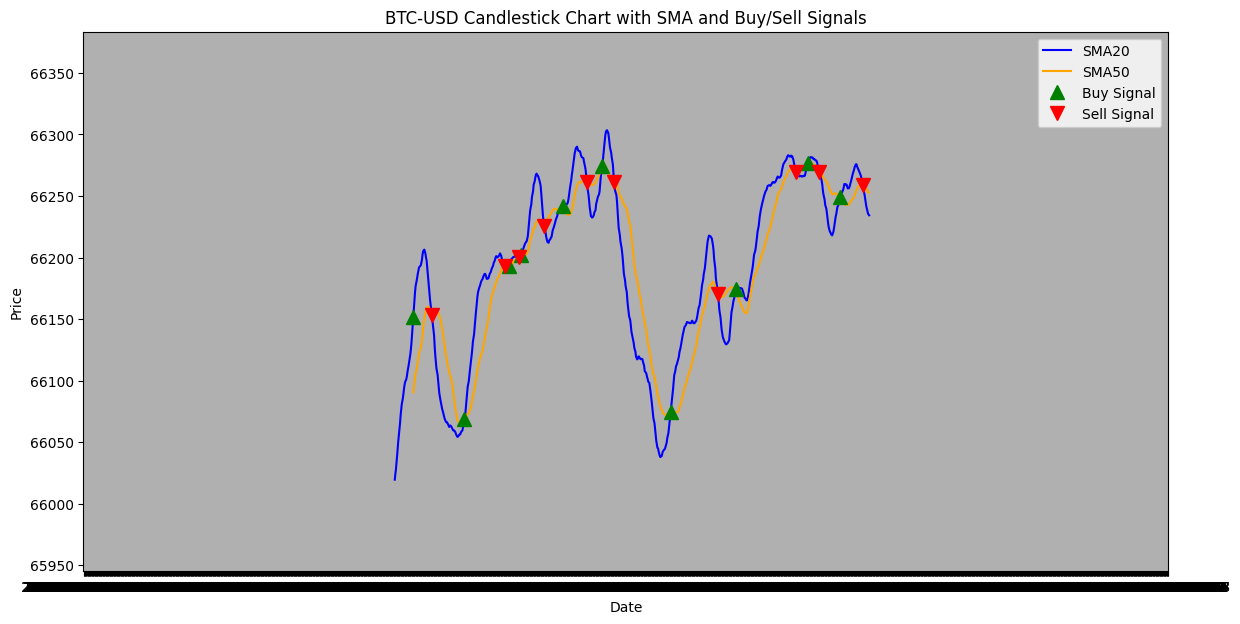

[*********************100%%**********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_5572\3627069656.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SM

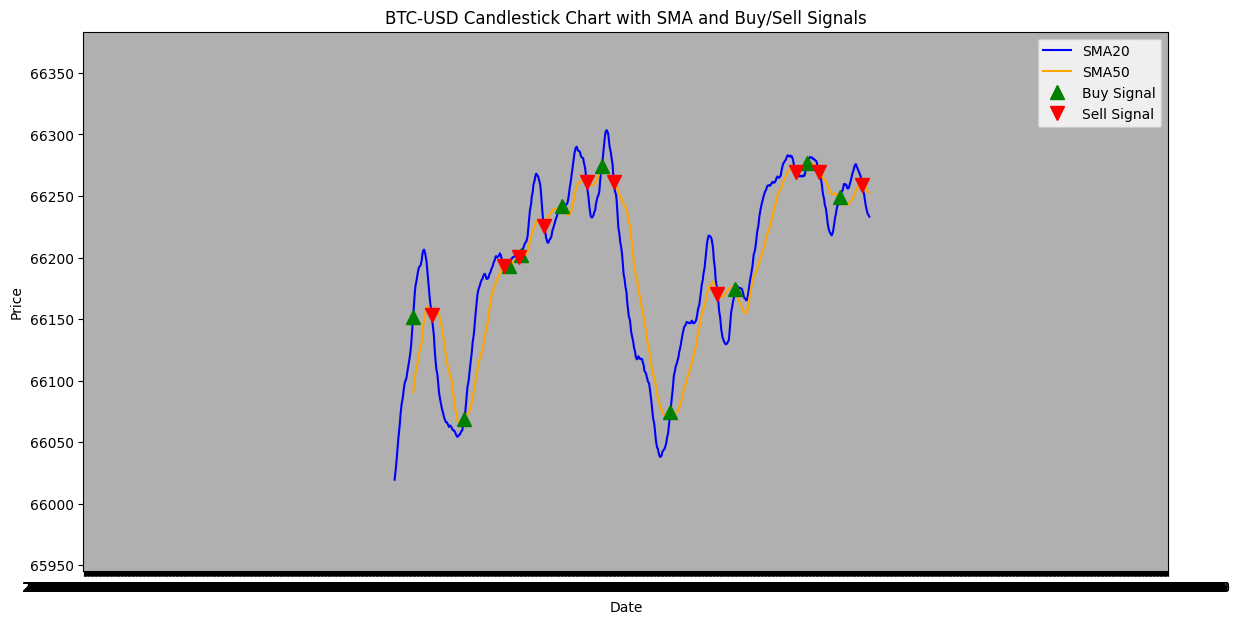

[*********************100%%**********************]  1 of 1 completed
C:\Users\Acer\AppData\Local\Temp\ipykernel_5572\3627069656.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SM

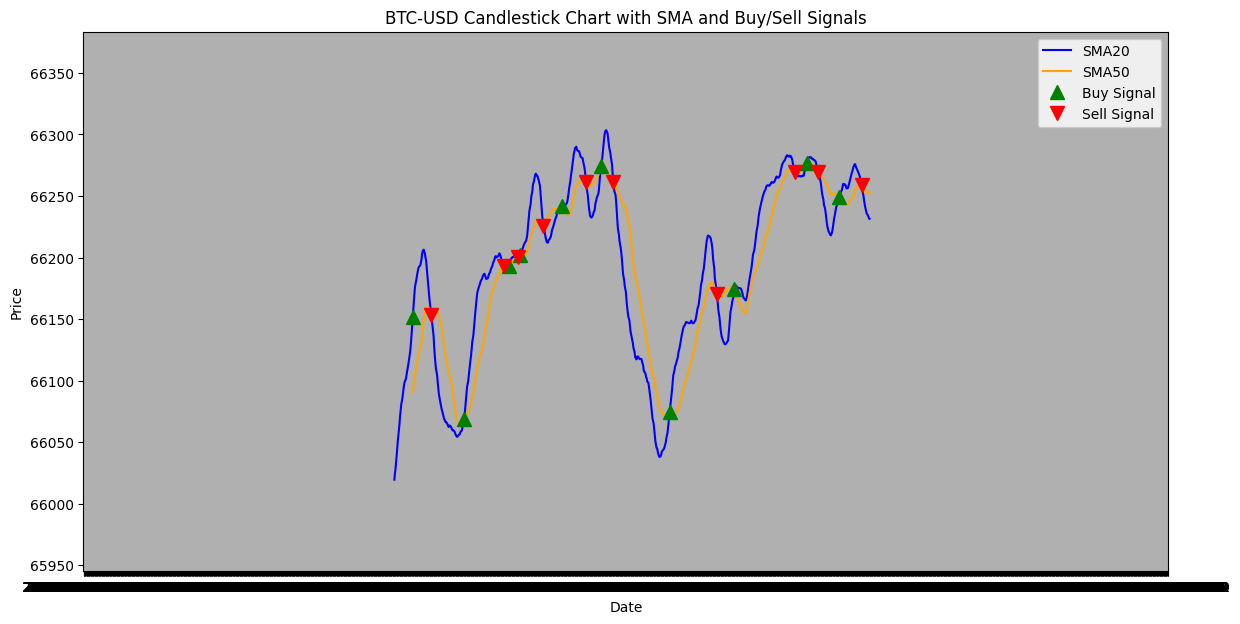

KeyboardInterrupt: 

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from ta.trend import SMAIndicator
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import time

# Define the type of trade
type_of_trade = 'BTC-USD'

# Fetch and plot data regularly
while True:
    # Fetch historical data for the last 1 minute
    data = yf.download(type_of_trade, period='1d', interval='1m')

    # Calculate SMAs
    data['SMA20'] = SMAIndicator(data['Close'], window=20).sma_indicator()
    data['SMA50'] = SMAIndicator(data['Close'], window=50).sma_indicator()

    # Define buy/sell signals
    data['Signal'] = 0
    data['Signal'][20:] = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, 0)
    data['Position'] = data['Signal'].diff()

    # Prepare the data for candlestick chart
    data['Date'] = mdates.date2num(data.index)
    ohlc = data[['Date', 'Open', 'High', 'Low', 'Close']]

    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot candlestick chart
    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')

    # Plot SMAs
    ax.plot(data['Date'], data['SMA20'], label='SMA20', color='blue', linewidth=1.5)
    ax.plot(data['Date'], data['SMA50'], label='SMA50', color='orange', linewidth=1.5)

    # Plot buy signals
    ax.plot(data[data['Position'] == 1].index,
            data['SMA20'][data['Position'] == 1],
            '^', markersize=10, color='green', lw=0, label='Buy Signal')

    # Plot sell signals
    ax.plot(data[data['Position'] == -1].index,
            data['SMA20'][data['Position'] == -1],
            'v', markersize=10, color='red', lw=0, label='Sell Signal')

    # Customize plot
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))  # Show tick every minute
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{type_of_trade} Candlestick Chart with SMA and Buy/Sell Signals')
    plt.legend()
    plt.grid()
    plt.show()

    # Delay between each fetch (e.g., fetch every minute)
    time.sleep(60)  # 60 seconds = 1 minute
